In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data/diamonds.csv')

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#droping unnamed column
#https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe/43983654
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [8]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
data.shape

(53940, 10)

In [11]:
data=data.sample(frac=0.2)

In [12]:
data.shape

(10788, 10)

In [13]:
data.reset_index(inplace=True,drop=True)

In [14]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.92,Good,I,VS1,60.9,63.0,3723,6.27,6.34,3.84
1,1.11,Good,D,SI2,58.0,62.0,5015,6.77,6.81,3.94
2,0.39,Ideal,E,VS2,61.3,56.0,911,4.71,4.75,2.90
3,2.31,Premium,I,SI2,62.9,58.0,17218,8.43,8.34,5.27
4,0.32,Premium,D,VS2,60.3,60.0,758,4.42,4.44,2.67


In [15]:
correlation=data.corr()

In [16]:
print(correlation)

          carat     depth     table     price         x         y         z
carat  1.000000  0.047925  0.171916  0.919928  0.969976  0.970266  0.969497
depth  0.047925  1.000000 -0.310769  0.006028 -0.008672 -0.012827  0.111704
table  0.171916 -0.310769  1.000000  0.117349  0.186996  0.180245  0.144692
price  0.919928  0.006028  0.117349  1.000000  0.879036  0.881490  0.874630
x      0.969976 -0.008672  0.186996  0.879036  1.000000  0.997136  0.991897
y      0.970266 -0.012827  0.180245  0.881490  0.997136  1.000000  0.989900
z      0.969497  0.111704  0.144692  0.874630  0.991897  0.989900  1.000000


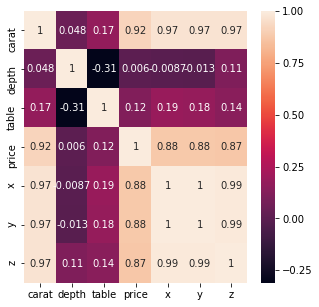

In [20]:
plt.subplots(figsize=(5,5))
sns.heatmap(correlation,annot=True)
plt.show()

In [21]:
data['cut'].unique()

array(['Good', 'Ideal', 'Premium', 'Very Good', 'Fair'], dtype=object)

In [22]:
data['color'].unique()

array(['I', 'D', 'E', 'F', 'G', 'J', 'H'], dtype=object)

In [23]:
data['clarity'].unique()

array(['VS1', 'SI2', 'VS2', 'VVS2', 'VVS1', 'SI1', 'IF', 'I1'],
      dtype=object)

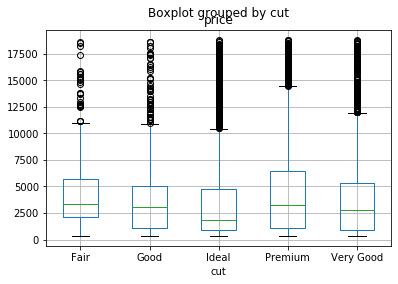

In [25]:
data.boxplot(by='cut',column=['price'])
plt.show()

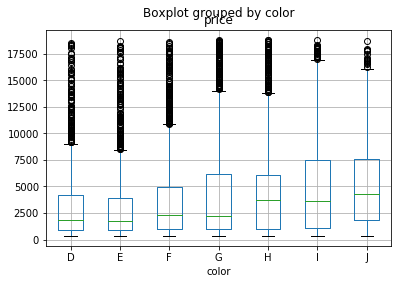

In [26]:
data.boxplot(by='color',column=['price'])

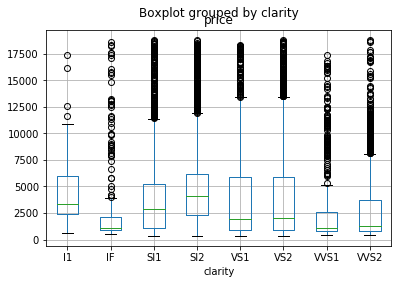

In [27]:
data.boxplot(by='clarity',column=['price'])

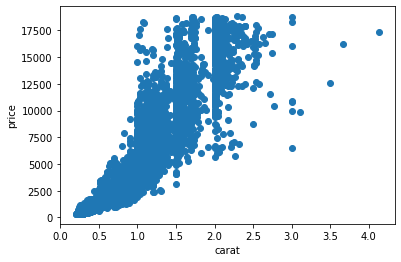

In [29]:
plt.scatter(data['carat'],data['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [31]:
clarity_dict={'IF':7,'VVS1':6,'VVS2':5,'VS1':4,'VS2':3,'SI1':2,'SI2':1,'I1':0}
data['clarity'].replace(clarity_dict,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.92,Good,I,4,60.9,63.0,3723,6.27,6.34,3.84
1,1.11,Good,D,1,58.0,62.0,5015,6.77,6.81,3.94
2,0.39,Ideal,E,3,61.3,56.0,911,4.71,4.75,2.90
3,2.31,Premium,I,1,62.9,58.0,17218,8.43,8.34,5.27
4,0.32,Premium,D,3,60.3,60.0,758,4.42,4.44,2.67


In [32]:
#we can encode the categorical features with one hot encoding scheme
data=pd.get_dummies(data,columns=['cut','color'])
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.92,4,60.9,63.0,3723,6.27,6.34,3.84,0,1,0,0,0,0,0,0,0,0,1,0
1,1.11,1,58.0,62.0,5015,6.77,6.81,3.94,0,1,0,0,0,1,0,0,0,0,0,0
2,0.39,3,61.3,56.0,911,4.71,4.75,2.90,0,0,1,0,0,0,1,0,0,0,0,0
3,2.31,1,62.9,58.0,17218,8.43,8.34,5.27,0,0,0,1,0,0,0,0,0,0,1,0
4,0.32,3,60.3,60.0,758,4.42,4.44,2.67,0,0,0,1,0,1,0,0,0,0,0,0


In [34]:
Numeric_data=data[['carat','depth','table','x','y','z']]

In [36]:
Numeric_data.head()
Numeric_data.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.804230,61.744689,57.464859,5.743345,5.745444,3.546297
std,0.479627,1.429552,2.264156,1.130819,1.120540,0.699815
min,0.200000,53.200000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,0.710000,61.800000,57.000000,5.700000,5.720000,3.530000
75%,1.050000,62.500000,59.000000,6.550000,6.550000,4.040000
max,4.130000,71.600000,79.000000,10.000000,9.850000,6.430000


In [37]:
#scale down 
from sklearn.preprocessing import scale
num_arr=scale(Numeric_data)

In [40]:
num_arr[:5]

array([[ 0.24138711, -0.59090395,  2.4447954 ,  0.46574997,  0.53062244,
         0.41970642],
       [ 0.637547  , -2.61960607,  2.00310919,  0.90792778,  0.9500826 ,
         0.56260798],
       [-0.8636905 , -0.31108296, -0.64700807, -0.9138448 , -0.88840234,
        -0.9235682 ],
       [ 3.1396095 ,  0.80820097,  0.23636435,  2.37595812,  2.31555928,
         2.46319867],
       [-1.00964415, -1.01063542,  1.11973677, -1.17030793, -1.16506755,
        -1.25224177]])

In [42]:
num_df=pd.DataFrame(num_arr,columns=Numeric_data.columns)

In [43]:
num_df.head()

,carat,depth,table,x,y,z
0,0.241387,-0.590904,2.444795,0.465750,0.530622,0.419706
1,0.637547,-2.619606,2.003109,0.907928,0.950083,0.562608
2,-0.863690,-0.311083,-0.647008,-0.913845,-0.888402,-0.923568
3,3.139610,0.808201,0.236364,2.375958,2.315559,2.463199
4,-1.009644,-1.010635,1.119737,-1.170308,-1.165068,-1.252242


In [44]:
numeric_feat=Numeric_data.columns

In [46]:
data.drop(numeric_feat,inplace=True,axis=1)

In [47]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,4,3723,0,1,0,0,0,0,0,0,0,0,1,0
1,1,5015,0,1,0,0,0,1,0,0,0,0,0,0
2,3,911,0,0,1,0,0,0,1,0,0,0,0,0
3,1,17218,0,0,0,1,0,0,0,0,0,0,1,0
4,3,758,0,0,0,1,0,1,0,0,0,0,0,0


In [48]:
data=pd.concat([data,num_df],axis=1)

In [49]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,4,3723,0,1,0,0,0,0,0,0,0,0,1,0,0.241387,-0.590904,2.444795,0.465750,0.530622,0.419706
1,1,5015,0,1,0,0,0,1,0,0,0,0,0,0,0.637547,-2.619606,2.003109,0.907928,0.950083,0.562608
2,3,911,0,0,1,0,0,0,1,0,0,0,0,0,-0.863690,-0.311083,-0.647008,-0.913845,-0.888402,-0.923568
3,1,17218,0,0,0,1,0,0,0,0,0,0,1,0,3.139610,0.808201,0.236364,2.375958,2.315559,2.463199
4,3,758,0,0,0,1,0,1,0,0,0,0,0,0,-1.009644,-1.010635,1.119737,-1.170308,-1.165068,-1.252242


In [50]:
data.to_csv('data/diamondsProcessed.csv',index=False)

In [53]:
x=data.drop(['price'],axis=1)
y=data['price']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [58]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred=lin_reg.predict(x_test)

In [59]:
print('Training Accuracy is :',lin_reg.score(x_train,y_train))

Training Accuracy is : 0.9059384561738419


In [60]:
from sklearn.metrics import r2_score

In [61]:
print('Testing R2 score:',r2_score(y_test,y_pred))

Testing R2 score: 0.908624150481427
